In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def gen_circle_points(n, R):
    points = []
    for i in range(n):
        r = R * np.sqrt(np.random.uniform(0,1))
        theta = np.random.uniform(0,1) * 2 * np.pi
        points.append([r*np.cos(theta), r*np.sin(theta)])
    return np.array(points)

    

In [28]:
def ball_projection(x, r):
    return r * x/np.linalg.norm(x)

def gen_least_square_data(n, d, r):
    """Generate a sintethic dataset which solution
    is given by a least square problem minimization.
    Input:
        n = number of samples
        d = dimension of dataset
        r = Ray of the ball 
    Output:
        x_star = Optimal weights 
        f_star = minimum achievable error
    """
    mean = np.zeros(d)
    sigma = 1
    cov = (sigma**2)*np.eye(d)
    b = np.random.normal(0,1e-03,n).reshape(-1,1)    
    
    A = np.random.multivariate_normal(mean, cov, n)

    x_star = np.dot( np.dot( np.linalg.inv( np.dot(A.T, A) ), A.T), b )
    if(np.linalg.norm(x_star) > r):
        x_proj = ball_projection(x_star, r)
    f_star = np.linalg.norm(np.dot(A, x_star) - b, ord=2)
    
    return x_star, f_star

In [29]:
gen_least_square_data(500,2,100)

(array([[4.71949533e-05],
        [1.91822108e-05]]),
 0.022071764105844008)

In [17]:
n = 500
d = 2
mean = np.zeros(d)
sigma = 1
cov = (sigma**2)*np.eye(d)
b = np.random.normal(0,1e-03,n).reshape(-1,1)


In [18]:
A = np.random.multivariate_normal(mean, cov, n)
print(A.shape)

x_star = np.dot( np.dot( np.linalg.inv( np.dot(A.T, A) ), A.T), b )
f_star = np.linalg.norm(np.dot(A, x_star) - b, ord=2)

#print(x_star)
print(f_star)

(500, 2)
0.021942814267205145


In [20]:
xs = gen_circle_points(2000,r)
xs

array([[ 0.18572906,  1.5103315 ],
       [ 0.14805798,  0.8769719 ],
       [-1.30368055, -1.05793066],
       ...,
       [ 0.22689257,  0.20004936],
       [-1.50860569,  1.02278206],
       [-1.21999526, -0.83427961]])

<IPython.core.display.Javascript object>


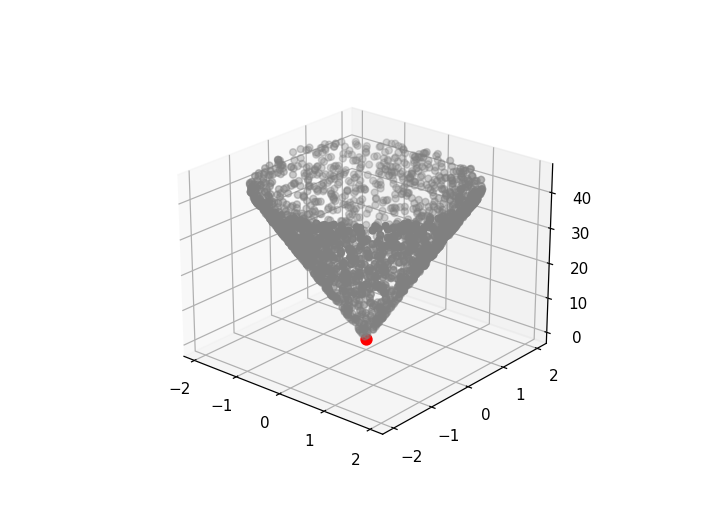

In [19]:
%matplotlib notebook

r = 2
xs = gen_circle_points(2000,r)
fs = []
for i,x in enumerate(xs):
    #print(x.shape)
    f = np.linalg.norm(np.dot(A, x.reshape(-1,1)) - b, ord=2)
    fs.append(f)
fs = np.array(fs)
ax = plt.axes(projection='3d')
ax.scatter3D(xs[:,0], xs[:,1], fs, c='gray')
ax.scatter3D(x_star[0,:], x_star[1,:], f_star, marker='o', c='r', s=50)

plt.show()